# 图像阈值
## 目标
- 本节你将学到  
  简单阈值(Simple thresholding)   
  自适应阈值(Adaptive thresholding)  
  Otus阈值设置（Otsu’s thresholding）
- 将要学习的函数有 cv2.threshold， cv2.adaptiveThreshold 等  

<font size=4  color=blue>阈值处理是指提出图像内像素值过于一定值或低于一定值的像素点，通过阈值处理可以得到一幅二值图像</font>

## 11.1简单阈值（Simple Thresholding）
与名字一样，这种方法非常简单。但像素值高于阈值时，我们给这个像素
赋予一个新值（可能是白色），否则我们给它赋予另外一种颜色（也许是黑色）。
这个函数就是 cv2.threshhold()。这个函数的第一个参数就是原图像，原图
像应该是灰度图。第二个参数就是用来对像素值进行分类的阈值。第三个参数
就是当像素值高于（有时是小于）阈值时应该被赋予的新的像素值。 OpenCV
提供了多种不同的阈值方法，这是由第四个参数来决定的。这些方法包括：  
- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

### cv.threshold()
- retval,dst = cv.threshold(src,thresh,maxval,type)
- retval:返回的阈值  
- dst   :阈值分割结果图像，与原始图像具有相同的大小和类型
- src   :要分割的图像，可以值多通道，8位或32位腹地啊型数值
- thresh:阈值
- maxval:当type参数为THRESH_BINARY或者THRESH_BINARY_INV类型时，需要设定最大值
- type  :阈值分割的类型

我们先读一张灰度图

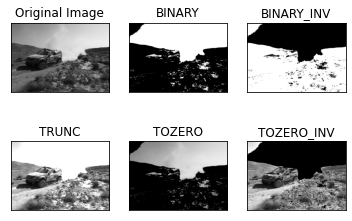

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# img=cv2.imread('tower.jpg',0)
img = cv2.imread('./pics_input/test_1.jpg',0)
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

<table><tr><td bgcolor=green><p algin=left>注意：为了同时在一个窗口中显示多个图像，我们使用函数 plt.subplot()。你
可以通过查看 Matplotlib 的文档获得更多详细信息。</p></td></tr></table>

## 11.2 自适应阈值
在前面的部分我们使用是全局阈值，整幅图像采用同一个数作为阈值。当
时这种方法并不适应于所有情况，尤其是当同一幅图像上的不同部分的具有不
同亮度时。这种情况下我们需要采用自适应阈值。此时的阈值是根据图像上的
每一个小区域计算与其对应的阈值。因此在同一幅图像上的不同区域采用的是
不同的阈值，从而使我们能在亮度不同的情况下得到更好的结果。
这种方法需要我们指定三个参数，返回值只有一个。
- Adaptive Method- 指定计算阈值的方法。  
    – cv2.ADPTIVE_THRESH_MEAN_C：阈值取自相邻区域的平均值  
    – cv2.ADPTIVE_THRESH_GAUSSIAN_C：阈值取值相邻区域的加权和，权重为一个高斯窗口。
- Block Size - 邻域大小（用来计算阈值的区域大小）。
- C - 这就是是一个常数，阈值就等于的平均值或者加权平均值减去这个常数。  

### cv.adaptivaThreshold
dst = cv.adaptivateThreshold(src,maxValue,adaptiveMethold,thresholdType,blockSize,C)
    - dst:自适应阈值处理结果
    - src:要进行出力的原始图像，该图像必须时八位单通道图像
    - maxValue:最大值
    - adaptivateMethod:代表自适应方法
    - thresholdType:代表阈值处理方式，可以是cv.THRESH_BINARY或cv.THRESH_BINARY_INV
    - blockSize:代表块大小，表示一个像素在计算阈值时所使用的邻域尺寸，通常为3、5、7等
    - C是常量
我们使用下面的代码来展示简单阈值与自适应阈值的差别：

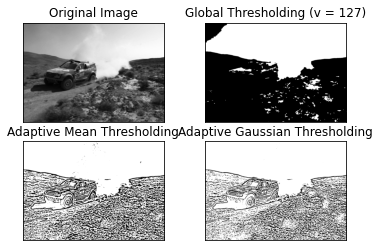

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('tower.jpg',0)
img = cv2.imread('./pics_input/test_1.jpg',0)

# 中值滤波
img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#11 为 Block size, 2 为 C 值
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                            cv2.THRESH_BINARY,11,2)

titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## 11.3 Otsu’s 二值化（Otsu’s  Binarization）
在第一部分中我们提到过 retVal，当我们使用 Otsu 二值化时会用到它。
那么它到底是什么呢？  
在使用全局阈值时，我们就是随便给了一个数来做阈值，那我们怎么知道
我们选取的这个数的好坏呢？答案就是不停的尝试。如果是一副双峰图像（简
单来说双峰图像是指图像直方图中存在两个峰）呢？我们岂不是应该在两个峰
之间的峰谷选一个值作为阈值？这就是 Otsu 二值化要做的。简单来说就是对
一副双峰图像自动根据其直方图计算出一个阈值。（对于非双峰图像，这种方法
得到的结果可能会不理想）。  
这里用到到的函数还是 cv2.threshold()，但是需要多传入一个参数
（ flag）： cv2.THRESH_OTSU。这时要把阈值设为 0。然后算法会找到最
优阈值，这个最优阈值就是返回值 retVal。如果不使用 Otsu 二值化，返回的
retVal 值与设定的阈值相等。  
下面的例子中，输入图像是一副带有噪声的图像。第一种方法，我们设
127 为全局阈值。第二种方法，我们直接使用 Otsu 二值化。第三种方法，我
们首先使用一个 5x5 的高斯核除去噪音，然后再使用 Otsu 二值化。看看噪音
去除对结果的影响有多大吧。

[[103 102 103 ... 212 212 212]
 [103 103 103 ... 212 212 212]
 [104 103 104 ... 212 212 212]
 ...
 [ 93  94  96 ...  71  87  96]
 [ 96  99 102 ...  69  85  94]
 [101 104 104 ...  72  88  98]]


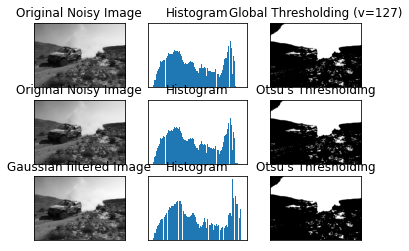

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# img = cv2.imread('nazha.jpeg',0)
img = cv2.imread('./pics_input/test_1.jpg',0)
print(img)
# global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
#（ 5,5）为高斯核的大小， 0 为标准差
blur = cv2.GaussianBlur(img,(5,5),0)
# 阈值一定要设为 0！
ret3,th3 = cv2.threshold(blur,0,200,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
        img, 0, th2,
        blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
            'Original Noisy Image','Histogram',"Otsu's Thresholding",
            'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
# 这里使用了 pyplot 中画直方图的方法， plt.hist, 要注意的是它的参数是一维数组
# 所以这里使用了（ numpy） ravel 方法，将多维数组转换成一维，也可以使用 flatten 方法
#ndarray.flat 1-D iterator over an array.
#ndarray.flatten 1-D array copy of the elements of an array in row-major order.
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## 11.4Otsu’s二值化是如何工作的？
在这一部分我们会演示怎样使用Python来实现Otsu二值化算法，从而告诉大家它是如何工作的。如果你不感兴趣的话可以跳过这一节。  
因为是双峰图，Otsu算法就是要找到一个阈值（t）,使得同一类加权方差最小，需要满足下列关系式：  $$σ^2_w(t)=q_1(t)σ^2_1(t)+q_2(t)σ^2_2(t)$$
<font color=blue size=4>**其中：**</font>  
概率：$$q_1(t)=\sum_{i=1}^tP(i)\quad  \& \quad  q_2(t)=\sum_{i=i+1}^IP(i)$$  
均值：$$\mu_1(t)=\sum_{i=1}^t\frac{iP(i)}{q_1(t)}\quad  \& \quad  \mu_2(t)=\sum_{i=i+1}^I\frac{iP(i)}{q_2(t)}$$  
方差：$$σ^2_1(t)=\sum_{i=1}^t[i-\mu_1(t)]^2\frac{P(i)}{q_1(t)}\quad \& \quad σ^2_2(t)=\sum_{i=t+1}^I[i-\mu_2(t)]^2\frac{P(i)}{q_2(t)}$$  

大类间差法，大津法  
穷举法：阈值t=0开始找到使得方差最小的t的值  
设：  
灰度值为i，范围[0，255]
灰度值为i的点的个数为$n_i$,点的总个数为N，灰度值为i的点出现的概率为P(i)

其实就是在两个峰之间找到一个阈值t，将这两个峰分开，并且使每一个峰内的方差最小。实现这个算法的Python代码如下：

In [8]:
import cv2
import numpy as np
img = cv2.imread('tower.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
# 计算归一化直方图
#CalcHist(image, accumulate=0, mask=NULL)
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh,ret)

65 64.0


C:\Anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in multiply
C:\Anaconda3\envs\py368\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
